# Dog breed multi-class-classification 
by : Dharansh Rajnikant Patel(18BCE053)


### unziping the data 

In [0]:
#!unzip "/content/drive/My Drive/dog-vision/dog-breed-identification.zip" -d "/content/drive/My Drive/dog-vision/"

### getting ready to go

In [0]:
#import tensorflow into the colab

In [0]:
#import tensorflow as tf
#print("version",tf.__version__)

In [0]:
#importing the tensorflow 2.x
try:
  #%tensorflow_version exits only in colab
  %tensorflow_version 2.x
except Exception:
  pass

In [14]:
#import necessary tools
import tensorflow as tf
import tensorflow_hub as hub
print("tf vesion:",tf.__version__)
print("hub version",hub.__version__)

#check for gpu availability
print("GPU","avalaibale" if tf.config.list_physical_devices("GPU") else "not available")

tf vesion: 2.2.0-rc2
hub version 0.8.0
GPU avalaibale


## getting out data(turning into tensors)

with all ml models, our data has to be in the numerical format. turning images into tensors
(numerical representation).

lets start by accessing data and checking out the labels.

In [15]:
#checking the labels of our data
import pandas as pd
labels_csv = pd.read_csv("/content/drive/My Drive/dog-vision/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     d286e40e002940218197b5251d47e96f  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [16]:
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

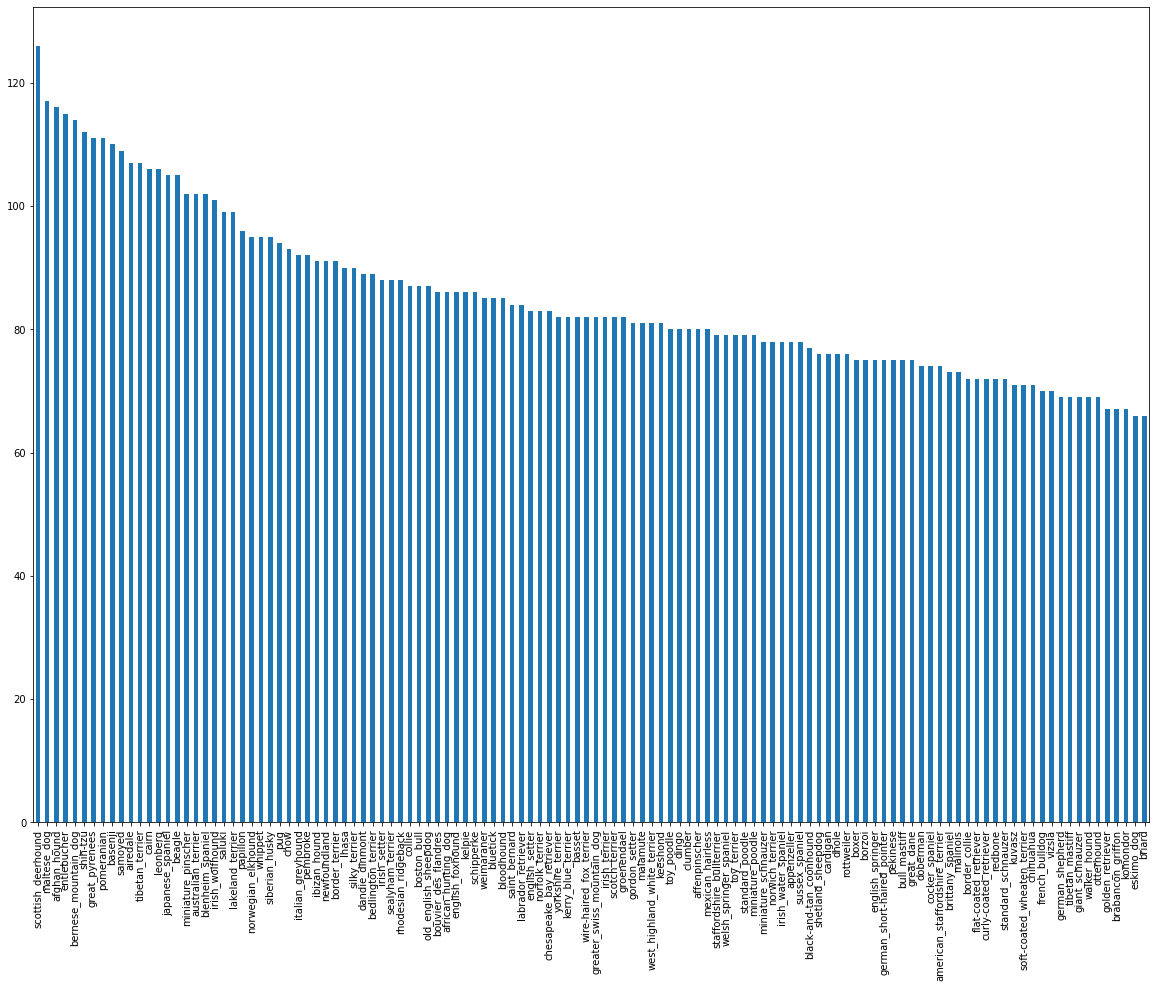

In [17]:
# how many images of each breed
labels_csv["breed"].value_counts().plot.bar(figsize=(20,15))

In [18]:
labels_csv["breed"].value_counts().mean(),labels_csv["breed"].value_counts().median()

(85.18333333333334, 82.0)

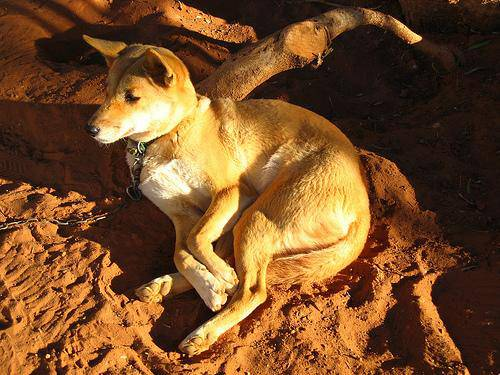

In [19]:
#lets view an image
from IPython.display import Image
Image("/content/drive/My Drive/dog-vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")

### getting images and their labels

lets an list of all our image fill pathnames.

In [20]:
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [21]:
# create pathname from image
filenames = [ "/content/drive/My Drive/dog-vision/train/"+fname + ".jpg" for fname in labels_csv["id"] ]

# chechk the first 10
filenames[:10]

['/content/drive/My Drive/dog-vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/My Drive/dog-vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/My Drive/dog-vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/My Drive/dog-vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/My Drive/dog-vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/My Drive/dog-vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/My Drive/dog-vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/My Drive/dog-vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/My Drive/dog-vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/drive/My Drive/dog-vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [22]:
# check whether number of filenames matches number of actual image filse
import os
if len(os.listdir("/content/drive/My Drive/dog-vision/train/"))==len(filenames):
  print("all same data.")
else:
  print("data not matched.")

all same data.


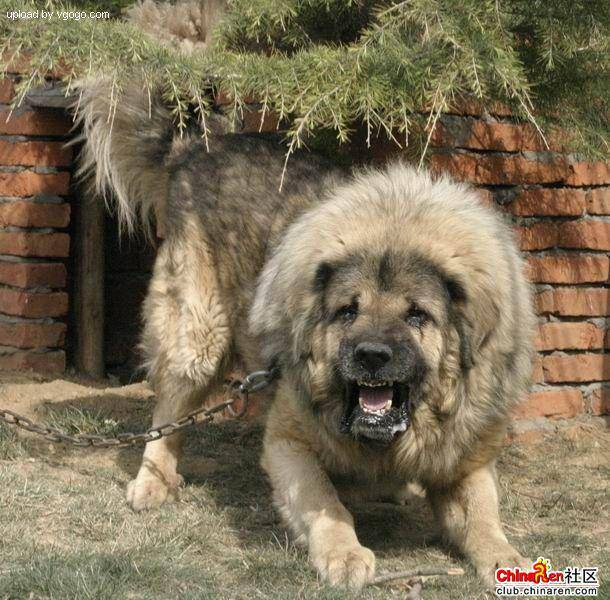

In [23]:
Image(filenames[9000])

In [24]:
import numpy as np
labels = labels_csv["breed"]
labels = np.array(labels)
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [25]:
if len(labels) == len(filenames):
  print("matches.")
else:
  print("dont match.")

matches.


In [26]:
# find unique labels values
uniques_breeds = np.unique(labels)
len(uniques_breeds)

120

In [27]:
# turn a single label into boolean array 
print(labels[0])
labels[0] == uniques_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [28]:
#turn every labels int a boolean array
boolean_labels = [label == uniques_breeds for label in labels]
boolean_labels[:3]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [29]:
# example : turning boolean array into integers
print(labels[0])
print(np.where(uniques_breeds == labels[0])) #index where it occurs
print(boolean_labels[0].argmax()) #index where label occurs in boolean array
print(boolean_labels[0].astype(int)) #there will be 1 where the sample oocurs

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


### creating our own validation set

In [0]:
# setup X and y variables
X = filenames
y = boolean_labels

In [31]:
len(filenames),len(boolean_labels)

(10222, 10222)

we are going to start off experimenting with ~1000 images and increase as needed.

In [0]:
# set number of images to use for experimenting
NUM_IMAGES = 1000 #@param {type:"slider",min:1000,max:10000,step:1000}

In [33]:
# lets split our data into train and validation
from sklearn.model_selection import train_test_split

X_train,X_val,y_train,y_val = train_test_split(X[:NUM_IMAGES],
                                               y[:NUM_IMAGES],
                                               test_size=0.2,
                                               random_state=42)
len(X_train),len(X_val),len(y_train),len(y_val)

(800, 200, 800, 200)

### precprocessing images( tuning images into tensors)

make a fucntion which does few things:
1. take an image  filepath as input 
2. use tensorflow to read the file and save it to a varible, `image`
3. turn jpg to tensors
4. resize the image to shape of(224,224)
5. return the modified image



In [34]:
# convert image to numpy aaray
from matplotlib.pyplot import imread
image = imread(filenames[42])
image.shape

(257, 350, 3)

In [35]:
image[:2]

array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)

In [36]:
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)>

In [0]:
# define image size
IMG_SIZE = 224

# create a function for preprocessing as mentioned above
def  process_image(image_path,img_size = IMG_SIZE):
  """
  Takes an image file path and turn the image into the tensor.
  """
  # read in an image file
  image = tf.io.read_file(image_path)
  # turn a jpg image into numerical tensor with RGB channels.
  image = tf.image.decode_jpeg(image,channels=3)
  # convert the colour channel  values to 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image,tf.float32)
  # resize the image to our desired values(244,244)
  image = tf.image.resize(image,size=[IMG_SIZE,IMG_SIZE])

  return image

### turning our data into batches

if we try to process 10k+ images in one go...they all might not fit into memory.

so thats why we do about 32 at a time.


we need data in tuples like `(image,label)`

In [0]:
# create a simple function to return a tuple (image,label)
def get_image_label(image_path, label):
  """
  takes image path name and return the tuple of processed image and label
  """
  image = process_image(image_path)
  return image,label

In [39]:
# demo of the abo e
(process_image(X[42]),tf.constant(y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

now we have got a way to turn our data into tuples of tensors
now lets make a fucntion to turn all our data into batches

In [0]:
# define the batch size ,32 is default
BATCH_SIZE = 32

#Create a function to turn data into batches
def create_data_batches(X,y=None,batch_size=BATCH_SIZE,valid_data=False,test_data=False):
  """
  creates batches of our data out of image(X) and label (y) pairs.
  Shuffles the data if its training data but doesnt shuffle if its validation data.
  also accepts test data as input(no labels).
  """
  # if the data is a test dataset , we probably dont have any labels:
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) ## only filepaths (no label)
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  # if the data is a valid dataset, we dont need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),tf.constant(y)))
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch
  
  else:
    # turn filepaths labels into Tensors
    print("Creating training data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    # suffle pathnames and labels before mapping image preprocess function is faster than shuffling images
    data =data.shuffle(buffer_size=len(X))
    data = data.map(get_image_label)

    data_batch = data.batch(BATCH_SIZE)
    return data_batch


In [41]:
# create training and validation data batches
train_data = create_data_batches(X_train,y_train)
val_data = create_data_batches(X_val,y_val,valid_data=True)


Creating training data batches...
Creating validation data batches...


In [42]:
# check out the different attributes of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## visualizing data batches

In [0]:
import matplotlib.pyplot as plt

# create a funtion for viewing image in a data batch
def show_25_images(images, labels):
  """
  Display a plot of 25 images and their labels froma adata batch.
  """
  # setup the figure
  plt.figure(figsize=(10,10))
  # loop through 25 (for displaying 25 images)
  for i in range(25):
    # create subplots (5 rows,5cols)
    ax = plt.subplot(5,5,i+1)
    # display an image
    plt.imshow(images[i])
    # ADD the image label title
    plt.title(uniques_breeds[labels[i].argmax()])
    plt.axis("off")

In [44]:
uniques_breeds[y[0].argmax()]

'boston_bull'

In [45]:
train_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

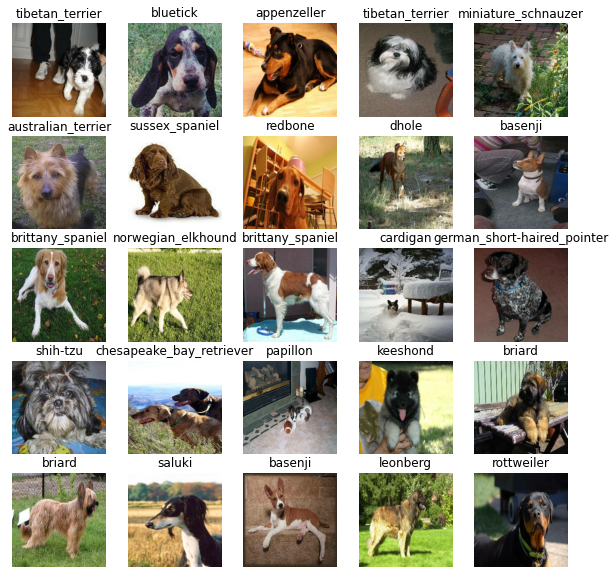

In [46]:
# now lets visualize the data in a training batch
train_images,train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images,train_labels)

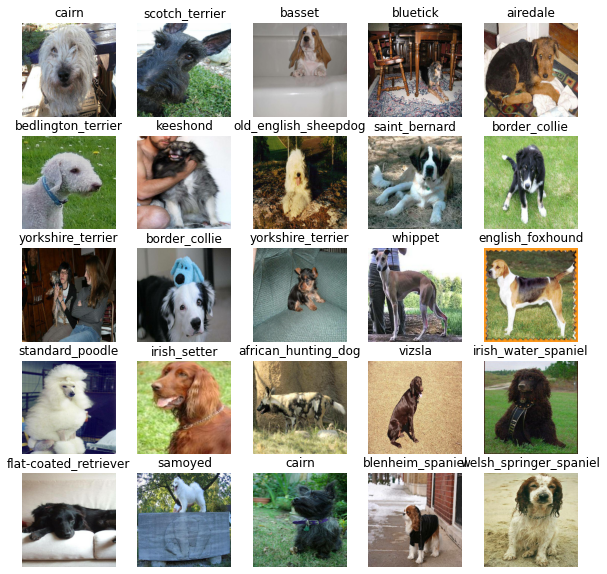

In [47]:
# now lets visualize our validation set
val_images,val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images,val_labels)

### now we have got our data into tensors

## building a model

before we build a model, there a few things we need to define:
* input must be in tensors
* output (labels) in form of tensors

In [0]:
## setup input shape
INPUT_SHAPE = [None,IMG_SIZE,IMG_SIZE,3] # batch,height,width,colour channels.

# setup output shape
OUTPUT_SHAPE = len(uniques_breeds)

# setup model URL from Tensorflow hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

now we have input,output and model
lets put them togrther into keras deep learning model!

we will create a funtion:
* takes the inputshape,outputshape, model as params
* define the layers in a keras model in sequential fashion.
* compile the model
* Return the model.

In [0]:
# create a function which will build a keras model
def create_model(input_shape=INPUT_SHAPE,output_shape=OUTPUT_SHAPE,model_url=MODEL_URL):
  print("building model.")

  #setup model layers
  model = tf.keras.Sequential([
                               hub.KerasLayer(MODEL_URL), #layer 1(input layer)
                               tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                                                     activation="softmax") #layer 2(output layer)
  ])

  # compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer = tf.keras.optimizers.Adam(),
      metrics=["accuracy"]   
  )

  #build the model
  model.build(INPUT_SHAPE)

  return model

In [50]:
model = create_model()
model.summary()

building model.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     multiple                  5432713   
_________________________________________________________________
dense (Dense)                multiple                  120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


In [51]:
print(1)

1


## creating callbacks

callbacks are helper function a model can use during training to do things like saving its progress , check its progress or stop training early if a model stops improving

i will create 2 callbacks one for tensorboard which helps track our model, another for stopping if it takes too long.


### TensorBorad CallBack

In [0]:
# load tensorboard notebook extension
%load_ext tensorboard

In [0]:
import datetime

# create a funnction to build a TensorBoard callback
def create_tensorboard_callback():
  # create a log directory for stroiing TensorBoard logs
  logdir =os.path.join("drive/My Drive/dog-vision/logs",
                       datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

### early stopping callback

stopping as it doesnt get overfit.


In [0]:
#create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3)

## traing a model (on subset of data)
our first model is only going to train on 1000 imaegs, to make sure everything is working.

In [0]:
NUM_EPOCHS = 100 #@param{type:"slider",min:10,max:100,step:10}

In [56]:
# cehcking wheter we are working on gpu
print("GPU","avai" if tf.config.list_physical_devices("GPU") else "not avail")

GPU avai


lets create a function which train a model.

* Create a model using `create_model`
* Setup a Tensorboard callback using `create_tensorboard_callback()`
* call the `fit()` function on our model passing it train data ,val data, number of epochs and callbacks.
* return the model

In [0]:
# the function describes above:
def train_model():
  """
  Trains a given model and return the trained version.
  """
  # create a model
  model = create_model()

  #create new Tensorboard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # fit the model to the adta passing it the callbacks we created
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[tensorboard, early_stopping])
  # return the fitted model
  return model

In [0]:
#fit the model to the data
#model = train_model()

building model.
Epoch 1/100
25/25 [==============================] - 5s 217ms/step - loss: 4.5938 - accuracy: 0.0875 - val_loss: 3.4414 - val_accuracy: 0.2700
Epoch 2/100
25/25 [==============================] - 5s 199ms/step - loss: 1.6385 - accuracy: 0.6988 - val_loss: 2.1965 - val_accuracy: 0.4950
Epoch 3/100
25/25 [==============================] - 5s 202ms/step - loss: 0.5691 - accuracy: 0.9325 - val_loss: 1.7342 - val_accuracy: 0.5600
Epoch 4/100
25/25 [==============================] - 5s 203ms/step - loss: 0.2532 - accuracy: 0.9862 - val_loss: 1.5316 - val_accuracy: 0.6250
Epoch 5/100
25/25 [==============================] - 5s 202ms/step - loss: 0.1519 - accuracy: 0.9937 - val_loss: 1.4658 - val_accuracy: 0.6250
Epoch 6/100
25/25 [==============================] - 5s 199ms/step - loss: 0.1032 - accuracy: 0.9987 - val_loss: 1.4044 - val_accuracy: 0.6300
Epoch 7/100
25/25 [==============================] - 5s 203ms/step - loss: 0.0769 - accuracy: 0.9987 - val_loss: 1.3808 - val_

it looks like it is overfitting , our model is more far more outut than in validation .

### checking tennsorboard logs

magic function (%tensorboard) will access the logs directory we created earlier and visualize its content.

In [0]:
%tensorboard --logdir drive/My\ Drive/dog-vision/logs

Reusing TensorBoard on port 6006 (pid 1633), started 2:15:27 ago. (Use '!kill 1633' to kill it.)

<IPython.core.display.Javascript object>

In [0]:
# make predictions on the validation dataset
predictions = model.predict(val_data,verbose=1)
predictions

7/7 [==============================] - 1s 125ms/step


array([[1.77792436e-03, 3.94866038e-05, 1.49524538e-04, ...,
        1.01311004e-03, 4.94320266e-05, 1.04483555e-03],
       [3.78802861e-03, 3.55741533e-04, 5.30693959e-03, ...,
        1.39446568e-03, 1.47499726e-03, 5.01647766e-04],
       [5.83925726e-07, 1.36649405e-05, 2.01511866e-05, ...,
        2.78507673e-06, 1.07447937e-04, 5.59980663e-06],
       ...,
       [1.81008800e-05, 1.95514849e-06, 7.13016634e-05, ...,
        1.16264864e-05, 2.60453991e-04, 3.05181420e-05],
       [4.28548222e-03, 8.16462678e-04, 3.45821391e-05, ...,
        7.46770456e-05, 4.71914645e-05, 6.67887228e-03],
       [1.35573806e-04, 2.41345242e-05, 6.49587077e-04, ...,
        1.04923705e-02, 2.91327189e-04, 4.75234447e-05]], dtype=float32)

In [0]:
predictions.shape

(200, 120)

In [0]:
len(y_val)

200

In [0]:
len(uniques_breeds)

120

In [0]:
predictions[0] # this will give array of probs of each category

array([1.77792436e-03, 3.94866038e-05, 1.49524538e-04, 1.70730636e-04,
       2.23129955e-05, 9.52076007e-05, 1.94770265e-02, 1.18268759e-03,
       1.24606042e-04, 1.76631403e-03, 4.07801155e-04, 6.62567691e-05,
       2.39623201e-04, 3.31558986e-05, 2.87286093e-04, 1.35821966e-03,
       6.76304771e-05, 9.44439545e-02, 9.34578293e-06, 1.49290718e-04,
       3.79292527e-03, 3.33889009e-04, 6.80859448e-05, 1.00106152e-03,
       1.04117898e-04, 8.44023307e-04, 1.84085563e-01, 3.60688973e-05,
       8.36056599e-04, 4.14107577e-04, 3.89261695e-05, 4.70167695e-04,
       1.15347246e-03, 3.84306077e-05, 4.69097926e-04, 1.82241108e-02,
       7.99830923e-06, 7.96789100e-05, 5.81207532e-05, 6.68235662e-05,
       9.75574483e-04, 4.72733846e-05, 5.47517324e-04, 1.19012795e-04,
       2.39839374e-05, 1.84733115e-04, 3.65722197e-04, 1.20693503e-03,
       4.19929624e-04, 8.53483507e-05, 1.69819628e-04, 7.65897857e-05,
       3.38132901e-04, 1.23083882e-04, 3.70922673e-04, 4.01570724e-05,
      

In [0]:
np.sum(predictions[0])

1.0

 but after applying softmax, each component will be in the interval ( 0 , 1 ) {\displaystyle (0,1)} (0,1), and the components will add up to 1, so that they can be interpreted as probabilities

In [0]:
np.sum(predictions[7])

0.99999976

In [0]:
print(predictions[42])
print(f"MAX value(prob of prections): {np.max(predictions[42])}")
print(f"values where it si max: {np.argmax(predictions[42])}")
print(f"predicted label:{uniques_breeds[np.argmax(predictions[42])]}")

[5.65866576e-05 4.13282032e-05 1.42069648e-05 3.69529953e-05
 5.45488670e-03 3.37764541e-05 3.27833928e-04 2.09996663e-03
 8.82905256e-03 5.77493347e-02 5.06812576e-05 3.75317723e-05
 1.93537708e-04 2.95804767e-03 1.23785611e-03 4.94838180e-03
 3.24364337e-05 1.86789519e-04 1.25611376e-04 4.58695606e-04
 7.75240187e-05 5.12318220e-04 1.81277224e-04 1.54364043e-05
 4.27642325e-03 2.07826233e-04 3.49721522e-05 4.33937385e-05
 4.98609370e-05 2.13807380e-05 6.38147831e-05 1.01433441e-04
 4.27740597e-05 2.48569322e-05 2.96161525e-05 2.45145875e-05
 8.93094621e-05 3.16754245e-04 2.43888990e-05 1.71097159e-01
 1.40256627e-04 3.99799974e-05 2.90487986e-03 9.23475181e-06
 5.65224502e-04 3.71800088e-05 8.28506745e-05 5.51858684e-04
 2.88559204e-05 2.30512407e-04 2.19241934e-04 1.82486052e-04
 4.58829978e-04 4.39672684e-03 1.60334443e-04 1.68813989e-04
 3.64078624e-05 8.65426591e-06 9.25180575e-05 9.46325163e-05
 5.51108133e-05 5.70021220e-04 1.53857436e-05 1.21675912e-04
 1.23914695e-04 8.754924

having the above functionallity is great but we want to be able to do it at scale.

And it would be even better if we could see the image the predictions is being made on!

**NOTE:** prediction probability is also know ans confidence levels.

In [0]:
# turn predictions into their repspective labels(easiesr to understand)
def get_pred_label(prediction_probabilities):
  return uniques_breeds[np.argmax(prediction_probabilities)]

# fet a predicted label based on an array of predictions probabilities
#pred_label = get_pred_label(predictions[81])
#pred_label

In [59]:
val_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

now since our val data is in batch dataset,
we'll have to unbatch them to make predictions on validation images and then compare thode predictions to the validation labels(truth labels).

In [60]:
#create a function to unbatch a dataset
def unbatchify(data):
  """
  takes a batched dataset of (image,label) tensors and return seperate arrays of images and labels.
  """
  images=[]
  labels=[]
  # loop through unbatched data
  for image,label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(uniques_breeds[np.argmax(label)])

  return images,labels

val_images,val_labels = unbatchify(val_data)
val_images[0],val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.2770141 , 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [0]:
get_pred_label(val_labels[0])

'affenpinscher'

In [0]:
images_ = []
labels_ = []

#loop through unbatched data
for image,label in val_data.unbatch().as_numpy_iterator():
  images_.append(image)

uniques_breeds[np.argmax(predictions[0])]

'irish_wolfhound'

now we have got the folloing thing:
* preiction labels
* validation labels
* validation images

lets make a function which makesit more visualizing.

we'll create a function which:
* takes an array of prediction probabilities, an array of truth labels and an array of integers.
* convert the pred_probs to predicted label.
* plot the predicted labels, its probability , the truth label and target image in a single plot.

In [0]:
def plot_pred(prediction_probabilities,labels,images,n=1):
  """
  view the predictions, ground truth and image for sample n
  """
  pred_prob,true_label,image = prediction_probabilities[n],labels[n],images[n]

  #get the pred label
  pred_label = get_pred_label(pred_prob)

  # plot image & remoce ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  #change the colour of the title depending on if the prediction is right or wrong
  if(pred_label == true_label):
    color="green"
  else:
    color="red"

  # change plot title to be preicted, prob of prediction and truth label
  plt.title("{} {:2.0f}% {}".format(pred_label,
                                   (np.max(pred_prob))*100,
                                   true_label),
            color=color)

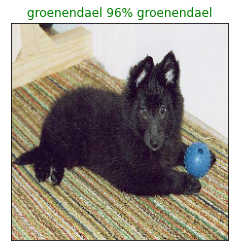

In [0]:
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images,
          n=77)

now we have got a function to visualize our models top prediction,
lets make function which makes best 10 predictions

this function will:
* take an input of prediction probab array and a ground truth array and an integer
* find the prediction using `get_pred_label()`
* find the top 10:
  * prediction probabs index
  * prediction probabs values
  * prediction labels
* plot th top 10 prediction colouring the true label green

In [0]:
def plot_pred_conf(prediction_probabilities, labels,n=1):

  pred_prob,true_label = prediction_probabilities[n],labels[n]

  #get the prediction label
  pred_label = get_pred_label(pred_prob)

  # find top 10
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  #find the top 10 prediction confidence value
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # find top 10 prediction labels
  top_10_pred_labels = uniques_breeds[top_10_pred_indexes]
  
  # setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")
  
  if np.isin(true_label,top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

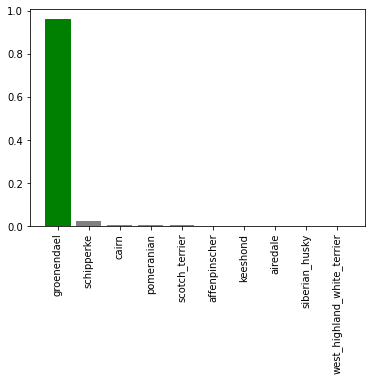

In [0]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,n=77)

In [0]:
predictions[0][predictions[0].argsort()[-10:][::-1]]

array([0.33563983, 0.18408556, 0.09444395, 0.06707544, 0.04626109,
       0.03668502, 0.02784506, 0.02526291, 0.02270187, 0.01947703],
      dtype=float32)

In [0]:
uniques_breeds[predictions[0].argsort()[-10:][::-1]]

array(['irish_wolfhound', 'cairn', 'border_terrier', 'standard_schnauzer',
       'scottish_deerhound', 'lhasa', 'lakeland_terrier',
       'soft-coated_wheaten_terrier', 'komondor', 'australian_terrier'],
      dtype=object)

lets make it more visualizing

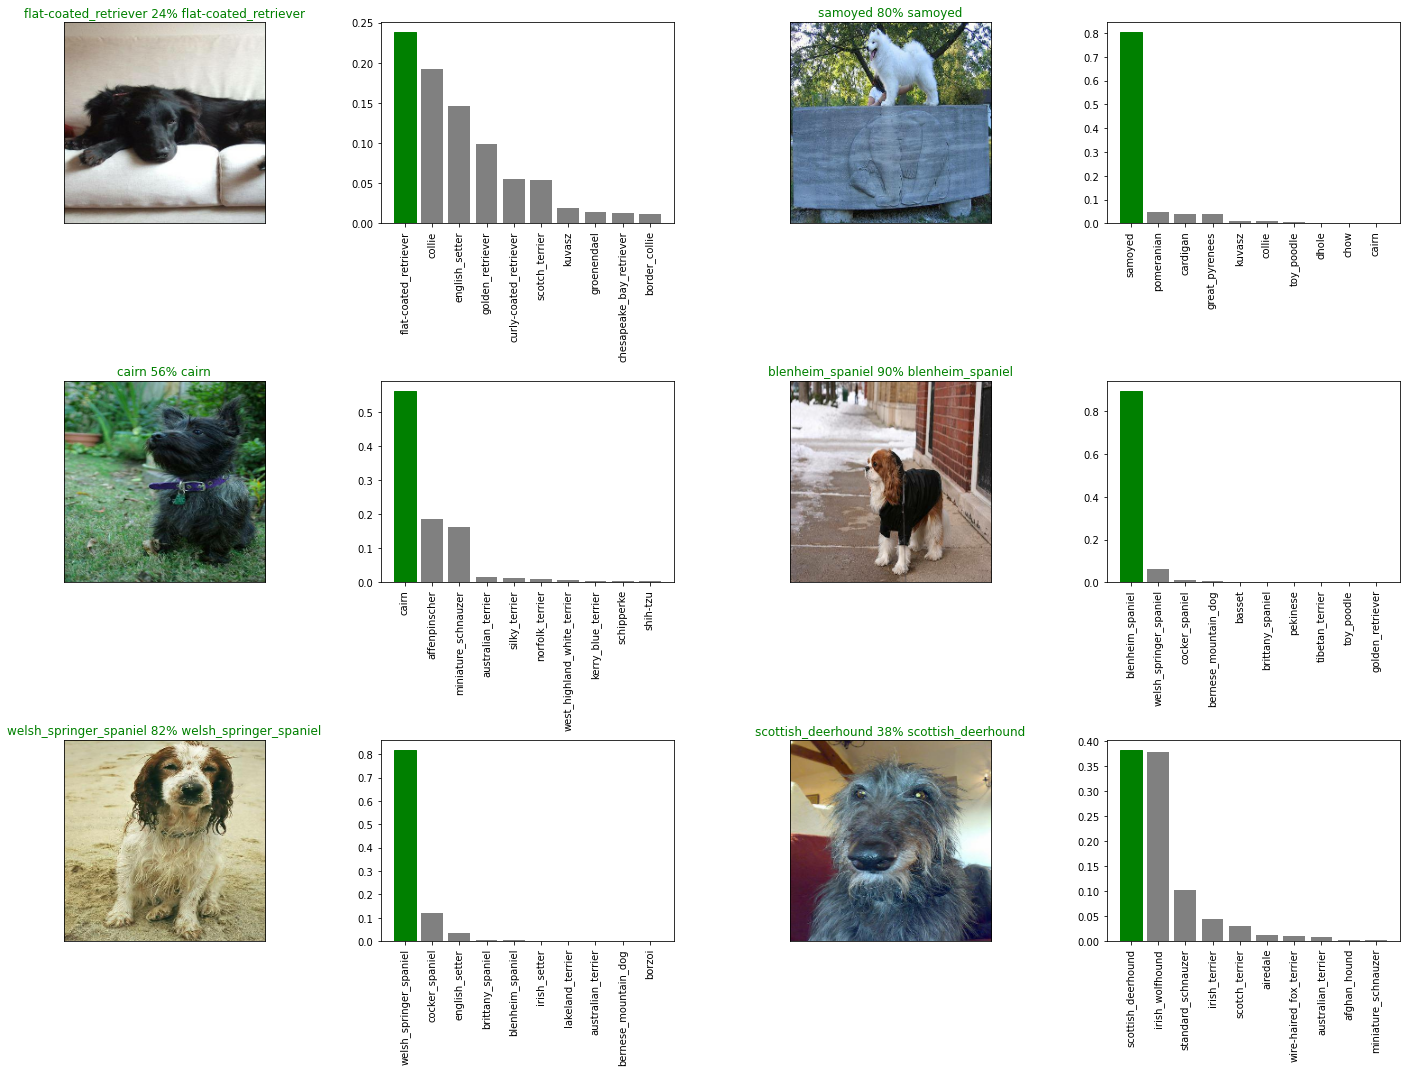

In [0]:
#lets check out few oredictions and their different values
i_multiplier = 20
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(10*num_cols,5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows,2*num_cols,2*i +1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows,2*num_cols,2*i + 2)
  plot_pred_conf(prediction_probabilities=predictions,
                 labels=val_labels,
                 n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

create a confusion matrix (after completion)

### saving and reloading a trained model

In [0]:
# Create s function to save a model
def save_model(model,suffix=None):
  # create a model directory pathname with currenttimestamps.
  modeldir = os.path.join("/content/drive/My Drive/dog-vision/models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-" + suffix + ".h5" # save format of model
  print(f"saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [0]:
# create a function to load a trained model
def load_model(model_path):
  print(f"loading sabed model from: {model_path}")
  model = tf.keras.models.load_model(model_path,
                              custom_objects={"KerasLayer":hub.KerasLayer})
  
  return model

NOW we have got function to sane and load  a trained model, lets make sure they work!

In [0]:
# save our model trained on 1000 images
save_model(model,suffix="1000-images-mobilenetv2-Adam")

saving model to: /content/drive/My Drive/dog-vision/models/20200328-10321585391522-1000-images-mobilenetv2-Adam.h5...


'/content/drive/My Drive/dog-vision/models/20200328-10321585391522-1000-images-mobilenetv2-Adam.h5'

In [0]:
# load a trained model
loaded_1000_image_model = load_model('/content/drive/My Drive/dog-vision/models/20200328-10321585391522-1000-images-mobilenetv2-Adam.h5')

loading sabed model from: /content/drive/My Drive/dog-vision/models/20200328-10321585391522-1000-images-mobilenetv2-Adam.h5


In [0]:
# evaluate the presaved model
model.evaluate(val_data)

7/7 [==============================] - 1s 116ms/step - loss: 1.2888 - accuracy: 0.6500


[1.2887566089630127, 0.6499999761581421]

In [0]:
# evalate the loaded model
loaded_1000_image_model.evaluate(val_data)

7/7 [==============================] - 1s 128ms/step - loss: 1.2888 - accuracy: 0.6500


[1.2887566089630127, 0.6499999761581421]

In [0]:
## training a big dog model (on full data)
len(X),len(y)

(10222, 10222)

In [0]:
# create a databatch with a full dataset
full_data = create_data_batches(X,y)

Creating training data batches...


In [0]:
full_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [0]:
# create a model for full model
full_model = create_model()

building model.


In [0]:
# create full model callbacks
full_model_tensorboard = create_tensorboard_callback()
# no validation set when training onn all the data set, so we cant monitor validation accuracy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience=3)

the below cell will take 30 min or more to run.

In [0]:
# fit the full model with full data
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard,full_model_early_stopping])

Epoch 1/100
320/320 [==============================] - 4669s 15s/step - loss: 1.3221 - accuracy: 0.6762
Epoch 2/100
320/320 [==============================] - 50s 156ms/step - loss: 0.4002 - accuracy: 0.8810
Epoch 3/100
320/320 [==============================] - 49s 155ms/step - loss: 0.2370 - accuracy: 0.9345
Epoch 4/100
320/320 [==============================] - 50s 156ms/step - loss: 0.1531 - accuracy: 0.9642
Epoch 5/100
320/320 [==============================] - 50s 155ms/step - loss: 0.1070 - accuracy: 0.9787
Epoch 6/100
320/320 [==============================] - 50s 158ms/step - loss: 0.0772 - accuracy: 0.9855
Epoch 7/100
320/320 [==============================] - 50s 155ms/step - loss: 0.0588 - accuracy: 0.9909
Epoch 8/100
320/320 [==============================] - 49s 155ms/step - loss: 0.0456 - accuracy: 0.9944
Epoch 9/100
320/320 [==============================] - 50s 156ms/step - loss: 0.0390 - accuracy: 0.9950
Epoch 10/100
320/320 [==============================] - 50s 156m

In [0]:
save_model(full_model,suffix="full-image-set-mobilenetv2-Adam")

saving model to: /content/drive/My Drive/dog-vision/models/20200328-12251585398315-full-image-set-mobilenetv2-Adam.h5...


'/content/drive/My Drive/dog-vision/models/20200328-12251585398315-full-image-set-mobilenetv2-Adam.h5'

In [4]:
# loading the fully trained model
import tensorflow_hub as hub
import tensorflow as tf
loaded_full_model = load_model('/content/drive/My Drive/dog-vision/models/20200328-12251585398315-full-image-set-mobilenetv2-Adam.h5')

loading sabed model from: /content/drive/My Drive/dog-vision/models/20200328-12251585398315-full-image-set-mobilenetv2-Adam.h5


In [0]:
len(X)

NameError: ignored

## making predictions on test data set

our test data must be converted into tensors

we already have `create_data_batches()` which will convert them into tesnsors.



In [0]:
import os
# load test imagefilenames
test_path ="/content/drive/My Drive/dog-vision/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames[:10]

['/content/drive/My Drive/dog-vision/test/ed9a58ccecb053df2a38486a51501248.jpg',
 '/content/drive/My Drive/dog-vision/test/ede76874678b483c87bfe1db25f78f9b.jpg',
 '/content/drive/My Drive/dog-vision/test/ed280557d6013c45e5bf89492fe44c1a.jpg',
 '/content/drive/My Drive/dog-vision/test/eec15026b5af233fa79dfb6081e1f339.jpg',
 '/content/drive/My Drive/dog-vision/test/ec5329231ea816ef212b367bdd17d06c.jpg',
 '/content/drive/My Drive/dog-vision/test/e90b4707267cec5bcd2dbe4cbb68a070.jpg',
 '/content/drive/My Drive/dog-vision/test/e8763575a23f1e1a86788b82bd105f07.jpg',
 '/content/drive/My Drive/dog-vision/test/ee7bdce4ac4008b3551ca66f82712e31.jpg',
 '/content/drive/My Drive/dog-vision/test/f21a70f111a4a05ac167c1707651293a.jpg',
 '/content/drive/My Drive/dog-vision/test/f0fc06a2b2123325e34a2450d3202853.jpg']

In [0]:
len(test_filenames)

10357

In [0]:
import tensorflow as tf
#create test databatch
test_data = create_data_batches(test_filenames,test_data=True)

Creating test data batches...


In [0]:
test_data

<BatchDataset shapes: (None, 224, 224, 3), types: tf.float32>

the below cell might take a fair long time as it has to predict on 10k+ data

In [0]:
# make predictions on test_data using loaded full model
test_predictions = loaded_full_model.predict(test_data,
                                             verbose=1)

324/324 [==============================] - 2456s 8s/step


In [0]:
import numpy as np

# save predictions (numpy array) to csv file (for access lates)
np.savetxt("/content/drive/My Drive/dog-vision/preds_array.csv",test_predictions,delimiter=",")

In [0]:
# load predictions (numpy assary) from csv file
test_predictions = np.loadtxt("/content/drive/My Drive/dog-vision/preds_array.csv",delimiter=",")

In [0]:
test_predictions[:10]

array([[5.43590728e-10, 8.90600376e-08, 1.99536676e-09, ...,
        3.53438395e-06, 1.57886620e-06, 1.33680079e-12],
       [3.10249005e-13, 7.77603145e-06, 9.98824912e-10, ...,
        7.22701361e-06, 4.43341122e-07, 4.72337388e-06],
       [1.10895537e-09, 1.36823409e-12, 2.62410765e-07, ...,
        8.77011630e-10, 4.23322535e-06, 8.64782851e-06],
       ...,
       [1.51572285e-05, 1.77750523e-10, 6.42927356e-09, ...,
        1.72344325e-08, 5.83315094e-04, 1.93114545e-07],
       [1.21972199e-09, 3.58793481e-11, 1.68340186e-08, ...,
        6.11883788e-09, 1.81129085e-08, 1.94350008e-10],
       [6.40636912e-08, 5.30757269e-08, 1.35666167e-09, ...,
        2.39419790e-10, 1.23414473e-10, 5.65916771e-08]])

In [0]:
test_predictions.shape

(10357, 120)

we have to make an dataframe of id,each brred with its preds value

In [0]:
import pandas as pd
preds_df = pd.DataFrame(columns = ["id"] + list(uniques_breeds))
preds_df

Empty DataFrame
Columns: [id, affenpinscher, afghan_hound, african_hunting_dog, airedale, american_staffordshire_terrier, appenzeller, australian_terrier, basenji, basset, beagle, bedlington_terrier, bernese_mountain_dog, black-and-tan_coonhound, blenheim_spaniel, bloodhound, bluetick, border_collie, border_terrier, borzoi, boston_bull, bouvier_des_flandres, boxer, brabancon_griffon, briard, brittany_spaniel, bull_mastiff, cairn, cardigan, chesapeake_bay_retriever, chihuahua, chow, clumber, cocker_spaniel, collie, curly-coated_retriever, dandie_dinmont, dhole, dingo, doberman, english_foxhound, english_setter, english_springer, entlebucher, eskimo_dog, flat-coated_retriever, french_bulldog, german_shepherd, german_short-haired_pointer, giant_schnauzer, golden_retriever, gordon_setter, great_dane, great_pyrenees, greater_swiss_mountain_dog, groenendael, ibizan_hound, irish_setter, irish_terrier, irish_water_spaniel, irish_wolfhound, italian_greyhound, japanese_spaniel, keeshond, kelpie, kerry_blue_terrier, komondor, kuvasz, labrador_retriever, lakeland_terrier, leonberg, lhasa, malamute, malinois, maltese_dog, mexican_hairless, miniature_pinscher, miniature_poodle, miniature_schnauzer, newfoundland, norfolk_terrier, norwegian_elkhound, norwich_terrier, old_english_sheepdog, otterhound, papillon, pekinese, pembroke, pomeranian, pug, redbone, rhodesian_ridgeback, rottweiler, saint_bernard, saluki, samoyed, schipperke, scotch_terrier, scottish_deerhound, sealyham_terrier, ...]
Index: []

[0 rows x 121 columns]

In [0]:
test_path

'/content/drive/My Drive/dog-vision/test/'

In [0]:
test_ids = [os.path.splitext(path)[0] for path in os.listdir(test_path)]

In [0]:
preds_df["id"] = test_ids

In [0]:
preds_df.head()

id  ... yorkshire_terrier
0  ed9a58ccecb053df2a38486a51501248  ...               NaN
1  ede76874678b483c87bfe1db25f78f9b  ...               NaN
2  ed280557d6013c45e5bf89492fe44c1a  ...               NaN
3  eec15026b5af233fa79dfb6081e1f339  ...               NaN
4  ec5329231ea816ef212b367bdd17d06c  ...               NaN

[5 rows x 121 columns]

In [0]:
preds_df[list(uniques_breeds)] = test_predictions

In [0]:
preds_df.head()

id  ... yorkshire_terrier
0  ed9a58ccecb053df2a38486a51501248  ...        1.3368e-12
1  ede76874678b483c87bfe1db25f78f9b  ...       4.72337e-06
2  ed280557d6013c45e5bf89492fe44c1a  ...       8.64783e-06
3  eec15026b5af233fa79dfb6081e1f339  ...       5.52249e-11
4  ec5329231ea816ef212b367bdd17d06c  ...       1.51381e-10

[5 rows x 121 columns]

In [0]:
preds_df.to_csv("/content/drive/My Drive/dog-vision/full_model_predictions_submission_1_mobilenetV2.csv",
                index=False)

## make prediction on our own image


In [0]:
import os
custom_path = "/content/drive/My Drive/dog-vision/dogs pics/"
custom_image_path = [custom_path + fname for fname in os.listdir(custom_path)]

In [6]:
custom_image_path

['/content/drive/My Drive/dog-vision/dogs pics/dog1.jpg']

In [63]:
# create databatches
custom_data = create_data_batches(custom_image_path,test_data=True)
custom_data

Creating test data batches...


<BatchDataset shapes: (None, 224, 224, 3), types: tf.float32>

In [64]:
# make prediction
custom_preds = loaded_full_model.predict(custom_data)
custom_preds

array([[1.55327040e-09, 4.50747395e-09, 1.71306136e-09, 7.26875493e-09,
        2.32311431e-05, 7.42032671e-06, 2.73986345e-08, 2.24400674e-06,
        2.88256416e-07, 5.95363019e-07, 2.72262810e-06, 5.82341605e-11,
        2.45395859e-06, 4.45886684e-07, 8.14325977e-05, 1.91488216e-05,
        2.41129015e-07, 8.87102601e-07, 6.53352856e-07, 4.62916523e-06,
        8.52132676e-09, 5.73738639e-08, 1.11858768e-07, 6.40955733e-08,
        2.42589915e-04, 4.76272963e-03, 3.08133807e-09, 1.62431562e-08,
        7.50049949e-04, 6.51721791e-07, 1.31840625e-06, 6.48357457e-07,
        8.68054144e-07, 1.32939385e-05, 9.78368917e-07, 2.40877114e-07,
        2.01258558e-06, 8.49883887e-04, 1.03347486e-06, 4.90489975e-03,
        8.32324076e-07, 3.98350778e-07, 1.77522580e-07, 4.68536291e-06,
        2.12720133e-05, 1.78526648e-07, 8.76243462e-07, 2.04345065e-06,
        1.97979007e-05, 2.31711048e-04, 3.70171307e-07, 8.20762580e-06,
        1.33982348e-06, 3.06114052e-05, 2.05474478e-07, 2.164548

In [0]:
# get the labels
custom_pred_label = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]

In [66]:
custom_pred_label

['labrador_retriever']